# Análise Exploratória da NBA (Luka Doncic e LeBron James)
## Trabalho Final de Computação em Estatística 2 - Python (2/2020)
### Prof. Dr. Eduardo Monteiro de Castro Gomes
**Grupo:** <br/>
Daniel 200016580 <br/>
Davi 200016741 <br/>
Hermes 190099682 <br/>
Igor 180122207

In [46]:
# Importando as bibliotecas
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import f

# Configurando a opção de exibição dos decimais
pd.options.display.float_format = '{:.2f}'.format

### 1. Introdução

<img src=img/ldHead.png />

Luka Doncic é um caso ABSURDO de sucesso internacional: profissional pelo **Real Madrid** aos **16 anos**, campeão do EuroBasket pela **Eslovênia** (e membro do quinteto ideal do torneio) aos **17** e campeão da Euroliga (incluindo MVP do torneio e das Finais) aos **19**. Nenhum outro jogador conseguiu tanto sucesso tão cedo na Europa quanto ele \[...\] (https://bolapresa.com.br/quem-tem-medo-de-luka-doncic/).

Agora, finalmente na NBA, com algumas temporadas na bagagem, o prêmio de novato do ano e incluso em discussões de MVP, vamos analisar esse fenômeno do basquete mundial e compará-lo a uma outra lenda, ainda em atividade: LeBron James

<img src=img/ljHead.png />

LeBron James lotava ginásios antes mesmo de chegar na NBA. Foi considerado o próximo talento do nível Michael Jordan desde cedo e, apesar da pressão envolvida nisso, cultiva até hoje uma carreira que comprova isso. Com quatro títulos da NBA, 4 MVPs, 17 seleções de allstar e diversos outros prêmios, o jogador coloca sua marca na história não só nas mentes de quem o viu jogar, mas nas estatísticas também. 

<img src=img/statsLeaderboard.png />

*(https://www.basketball-reference.com/leaders/)

### 2. Lendo os dados

Serão utilizados os dados dos jogadores em cada partida que atuaram e também os dados
condensados da carreira por temporada. <br/>
Os dados foram obtidos da própria NBA através do
site stats.nba.com, utilizando o pacote python nba_api <br/>
Arquivos de dados e script de extração em https://github.com/Hermezilla/trabalhoCE2


In [2]:
# Lendo os arquivos preparados anteriormente
ld = pd.read_csv('Luka Doncic.csv')
lj = pd.read_csv('LeBron James.csv')
ldC = pd.read_csv('Luka Doncic Career.csv')
ljC = pd.read_csv('LeBron James Career.csv')

In [3]:
#Juntando os dados
ld['Name'] = 'Luka Doncic'
lj['Name'] = 'LeBron James'

juntos = pd.concat([ld,lj])

In [31]:
#Dados do Luka Doncic na temporada atual
ld2021 = ldC[ldC['SEASON_ID'] == '2020-21']

#Dados do LeBron James na temporada atual
lj2021 = ljC[ljC['SEASON_ID'] == '2020-21']

#Juntando e colocando indices
juntos2021 = pd.concat([ld2021,lj2021])
juntos2021.rename(index={2: 'Luka Doncic', 17: 'LeBron James'}, inplace=True)

#Comparação da temporada atual até agora
juntos2021.T

,Luka Doncic,LeBron James
PLAYER_ID,1629029,2544
SEASON_ID,2020-21,2020-21
LEAGUE_ID,0,0
TEAM_ID,1610612742,1610612747
TEAM_ABBREVIATION,DAL,LAL
PLAYER_AGE,22.0,36.0
GP,56,41
GS,56,41
MIN,1964.0,1388.0
FGM,567,388


### 3. Exploração dos dados

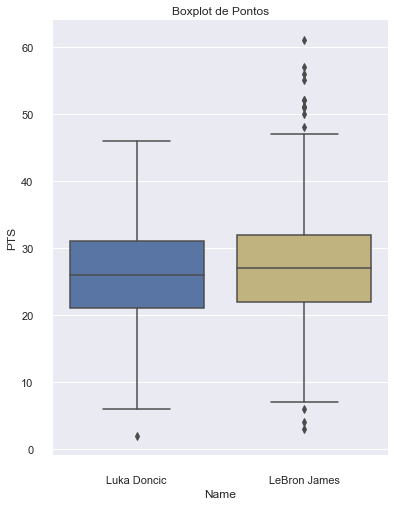

In [16]:
#Boxplot da distribuição de pontos
sns.set_theme(style="ticks", palette="pastel")
sns.set(rc={'figure.figsize':(6,8)})

sns.boxplot(x="Name", y="PTS",
            palette=["b", "y"],
            data=juntos).set_title('Boxplot de Pontos')
sns.despine(offset=10, trim=True)

#### BoxPlot de PONTOS. O que entendemos disso?

Logo de cara percebemos que os gráficos dos dois jogadores são bastante semelhantes em todos os apsectos. A maioria dos dados estão concentrados entre 22 e 32 pontos por partida. Todos os quartis (e até os limites inferiores e superiores) do Doncic tem valores ligeiramente mais baixos. LeBron James também apresenta mais ouliers, tanto para cima quanto para baixo. 

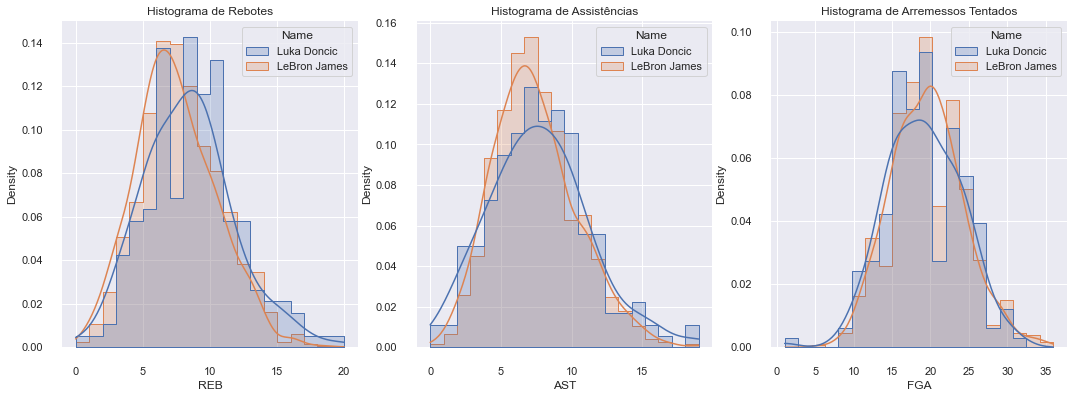

In [24]:
#Histogramas das densidades de rebotes, assistências e arremessos tentados
sns.set(rc={'figure.figsize':(18,6)})

fig, axs = plt.subplots(ncols=3)

sns.histplot(
    juntos, x="REB", hue="Name", element="step", bins=20,
    stat="density", common_norm=False, kde=True, ax=axs[0]
).set_title('Histograma de Rebotes')

sns.histplot(
    juntos, x="AST", hue="Name", element="step", bins=20,
    stat="density", common_norm=False, kde=True, ax=axs[1]
).set_title('Histograma de Assistências')

sns.histplot(
    juntos, x="FGA", hue="Name", element="step", bins=20,
    stat="density", common_norm=False, kde=True, ax=axs[2]
).set_title('Histograma de Arremessos Tentados')

sns.despine(offset=10, trim=True)

#### Histogramas de REBOTES, ASSISTÊNCIAS e ARREMESSOS TENTADOS. O que entendemos disso?

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Ut sed lectus tristique, interdum lorem id, mattis nisi. Mauris consectetur nec massa sit amet sodales. Quisque at sapien in augue fringilla lacinia eu quis enim. Ut varius bibendum metus convallis maximus. Donec fringilla porttitor ante, vel porta nulla accumsan id. Sed sollicitudin molestie tortor, non placerat ex elementum condimentum. Pellentesque mauris est, lobortis nec nunc eget, dictum scelerisque lacus. Nunc quis felis maximus neque porta bibendum eu vitae sem. Aenean sit amet rutrum metus, quis bibendum enim. In hac habitasse platea dictumst.

Pellentesque ac metus mollis, vulputate orci non, interdum lectus. Fusce varius dolor sed ligula auctor, vitae varius quam malesuada. Curabitur rutrum lorem et lobortis volutpat. Nullam sodales elementum dignissim. Nullam a malesuada libero, sed vulputate ipsum. Nulla sed convallis est, nec faucibus mauris. Interdum et malesuada fames ac ante ipsum primis in faucibus. Duis eu interdum ante. Etiam vel accumsan neque, sed aliquet magna.

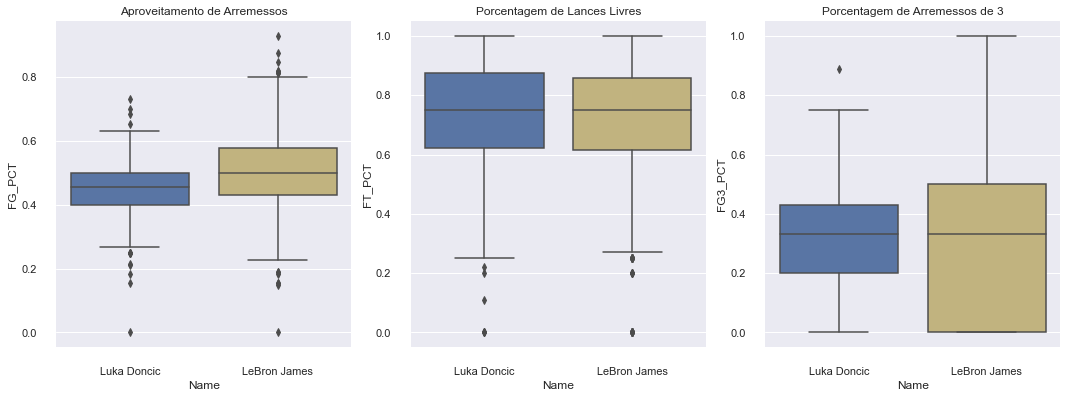

In [25]:
#Boxplots das porcentagens de aproveitamento de arremessos gerais, lances livres e de longa distância
sns.set(rc={'figure.figsize':(18,6)})

fig, axs = plt.subplots(ncols=3)

sns.boxplot(x="Name", y="FG_PCT",
            palette=["b", "y"],
            data=juntos, ax=axs[0]
).set_title('Aproveitamento de Arremessos')

sns.boxplot(x="Name", y="FT_PCT",
            palette=["b", "y"],
            data=juntos, ax=axs[1]
).set_title('Porcentagem de Lances Livres')

sns.boxplot(x="Name", y="FG3_PCT",
            palette=["b", "y"],
            data=juntos, ax=axs[2]
).set_title('Porcentagem de Arremessos de 3')

sns.despine(offset=10, trim=True)

#### Boxplots das porcentagens de aproveitamento de arremessos gerais, lances livres e de longa distância. O que entendemos disso?

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Ut sed lectus tristique, interdum lorem id, mattis nisi. Mauris consectetur nec massa sit amet sodales. Quisque at sapien in augue fringilla lacinia eu quis enim. Ut varius bibendum metus convallis maximus. Donec fringilla porttitor ante, vel porta nulla accumsan id. Sed sollicitudin molestie tortor, non placerat ex elementum condimentum. Pellentesque mauris est, lobortis nec nunc eget, dictum scelerisque lacus. Nunc quis felis maximus neque porta bibendum eu vitae sem. Aenean sit amet rutrum metus, quis bibendum enim. In hac habitasse platea dictumst.

Pellentesque ac metus mollis, vulputate orci non, interdum lectus. Fusce varius dolor sed ligula auctor, vitae varius quam malesuada. Curabitur rutrum lorem et lobortis volutpat. Nullam sodales elementum dignissim. Nullam a malesuada libero, sed vulputate ipsum. Nulla sed convallis est, nec faucibus mauris. Interdum et malesuada fames ac ante ipsum primis in faucibus. Duis eu interdum ante. Etiam vel accumsan neque, sed aliquet magna.

<AxesSubplot:xlabel='MIN', ylabel='PTS'>

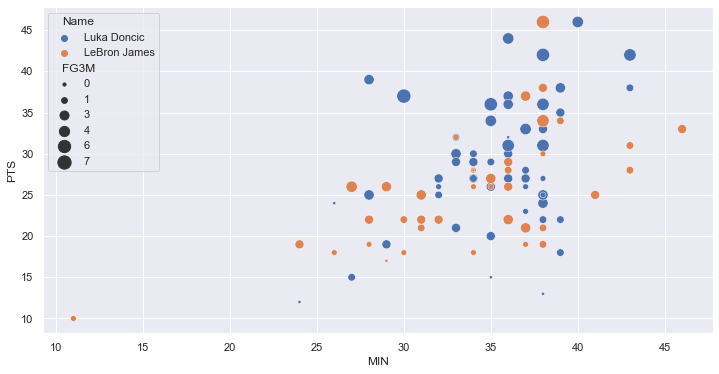

In [42]:
#Gráfico de dispersão de Minutos jogados por Pontos obtidos (Os tamanhos das bolas são o número de bolas de três daquela partida)
sns.set(rc={'figure.figsize':(12,6)})

sns.scatterplot(x="MIN", y="PTS",
                     hue="Name", size="FG3M",
                     sizes=(10, 200),
                     data=juntos[juntos['SEASON'] == 2020])

#### Gráfico de dispersão de PONTOS por MINUTOS jogados. O que entendemos disso?

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Ut sed lectus tristique, interdum lorem id, mattis nisi. Mauris consectetur nec massa sit amet sodales. Quisque at sapien in augue fringilla lacinia eu quis enim. Ut varius bibendum metus convallis maximus. Donec fringilla porttitor ante, vel porta nulla accumsan id. Sed sollicitudin molestie tortor, non placerat ex elementum condimentum. Pellentesque mauris est, lobortis nec nunc eget, dictum scelerisque lacus. Nunc quis felis maximus neque porta bibendum eu vitae sem. Aenean sit amet rutrum metus, quis bibendum enim. In hac habitasse platea dictumst.

Pellentesque ac metus mollis, vulputate orci non, interdum lectus. Fusce varius dolor sed ligula auctor, vitae varius quam malesuada. Curabitur rutrum lorem et lobortis volutpat. Nullam sodales elementum dignissim. Nullam a malesuada libero, sed vulputate ipsum. Nulla sed convallis est, nec faucibus mauris. Interdum et malesuada fames ac ante ipsum primis in faucibus. Duis eu interdum ante. Etiam vel accumsan neque, sed aliquet magna.

### 4. Testes de hipótese

Vamos supor que as carreiras desses jogadores já terminaram. Essas são nossas populações. Como desconhecemos as médias por partida nesse cenário, vamos usar os dados que temos até hoje como se fossem amostras e responder algumas perguntas. Com isso (e mais algumas suposições) poderemos retornar à imagem da introdução e afirmar onde Luka Doncic estará no ranking em comparação ao rei do basquete.

#### No fim de suas carreiras, Luka Doncic alcança LeBron James em PONTOS?

In [54]:
# Dados
n1 = len(ld['PTS'])
xbarra1 = np.mean(ld['PTS'])
S1 = np.var(ld['PTS'],ddof=1) #variancia

n2 = len(lj['PTS'])
xbarra2 = np.mean(lj['PTS'])
S2 = np.var(lj['PTS'],ddof=1) #variancia

alfa = 0.05

print("Vamos testar se as variancias são iguais")
print("H0: S1 - S2 = 0")
print("Ha: S1 - S2 <> 0 \n")
fobs = S1 / S2
pval = (1 - f.cdf(fobs,n1-1,n2-1)) * 2

print("P-valor: " + str ( round( pval , 4 ) ) )
print("Nesse caso, não há evidências para rejeitar-se a hipótese nula.")
print("Consideramos as variâncias iguais. \n\n")

print("Hipóteses:")
print("H0: miLD - miLJ <= 0")
print("Ha: miLD - miLJ > 0 \n")

#Variância combinada ponderada por causa da variancia igual
S2comb = ( (n1-1)*S1 + (n2-1)*S2 ) / ( n1 + n2 - 2)
gl = ( n1 + n2 - 2)

tobs = ( (xbarra1 - xbarra2) - (0) ) / np.sqrt( S2comb/n1 + S2comb/n2 )
pval = t.cdf(tobs,gl) * 2

print("P-valor: " + str ( round( pval , 4 ) ) )
print("Nesse caso, não há evidências para rejeitar-se a hipótese nula.")

Vamos testar se as variancias são iguais
H0: S1 - S2 = 0
Ha: S1 - S2 <> 0 

P-valor: 0.4101
Nesse caso, não há evidências para rejeitar-se a hipótese nula.
Consideramos as variâncias iguais. 


Hipóteses:
H0: miLD - miLJ <= 0
Ha: miLD - miLJ > 0 

P-valor: 0.0553
Nesse caso, não há evidências para rejeitar-se a hipótese nula.


#### Teste de comparação de médias de PONTOS. O que entendemos disso?

Com confiança de 95% podemos afirmar que Luka Doncic não terá uma média de PONTOS por jogo maior que LeBron James. Note, no entanto, que o p-valor está muito próximo do nível de significância escolhido. Se esse valor fosse ligeiramente flexibilizado o resultado do teste seria outro. Se supormos que terão carreiras igualmente longas, então podemos acreditar que Luka estará no ranking geral da NBA em PONTOS, mas não acima de LeBron James.

#### No fim de suas carreiras, Luka Doncic alcança LeBron James em ASSISTÊNCIAS?

In [58]:
# Dados
n1 = len(ld['AST'])
xbarra1 = np.mean(ld['AST'])
S1 = np.var(ld['AST'],ddof=1) #variancia

n2 = len(lj['AST'])
xbarra2 = np.mean(lj['AST'])
S2 = np.var(lj['AST'],ddof=1) #variancia

alfa = 0.05

print("Vamos testar se as variancias são iguais")
print("H0: S1 - S2 = 0")
print("Ha: S1 - S2 <> 0 \n")
fobs = S1 / S2
pval = (1 - f.cdf(fobs,n1-1,n2-1)) * 2

print("P-valor: " + str ( round( pval , 4 ) ) )
print("Nesse caso, há evidências para rejeitar-se a hipótese nula.")
print("Consideramos as variâncias diferentes. \n\n")

print("Hipóteses:")
print("H0: miLD - miLJ <= 0")
print("Ha: miLD - miLJ > 0 \n")

a = S1/n1
b = S2/n2
gl = (a + b)**2 / (a**2/(n1-1) + b**2/(n2-1))

tobs = ( (xbarra1 - xbarra2) - (0) ) / np.sqrt( S1/n1 + S2/n2 )
pval = 1 - t.cdf(tobs,gl)

print("P-valor: " + str ( round( pval , 4 ) ) )
print("Nesse caso, não há evidências para rejeitar-se a hipótese nula.")

Vamos testar se as variancias são iguais
H0: S1 - S2 = 0
Ha: S1 - S2 <> 0 

P-valor: 0.0009
Nesse caso, há evidências para rejeitar-se a hipótese nula.
Consideramos as variâncias diferentes. 


Hipóteses:
H0: miLD - miLJ <= 0
Ha: miLD - miLJ > 0 

P-valor: 0.136
Nesse caso, não há evidências para rejeitar-se a hipótese nula.


#### Teste de comparação de médias de ASSISTÊNCIAS. O que entendemos disso?

Com confiança de 95% podemos afirmar que Luka Doncic não terá uma média de ASSISTÊNCIAS por jogo maior que LeBron James. Difícil de afirmar se teria lugar no ranking a partir desse valor. Isso exigiria um outro estudo.

#### No fim de suas carreiras, Luka Doncic alcança LeBron James em ROUBOS?

In [61]:
# Dados
n1 = len(ld['STL'])
xbarra1 = np.mean(ld['STL'])
S1 = np.var(ld['STL'],ddof=1) #variancia

n2 = len(lj['STL'])
xbarra2 = np.mean(lj['STL'])
S2 = np.var(lj['STL'],ddof=1) #variancia

alfa = 0.05

print("Vamos testar se as variancias são iguais")
print("H0: S1 - S2 = 0")
print("Ha: S1 - S2 <> 0 \n")
fobs = S1 / S2
pval = f.cdf(fobs,n1-1,n2-1) * 2

print("P-valor: " + str ( round( pval , 4 ) ) )
print("Nesse caso, há evidências para rejeitar-se a hipótese nula.")
print("Consideramos as variâncias diferentes. \n\n")

print("Hipóteses:")
print("H0: miLD - miLJ <= 0")
print("Ha: miLD - miLJ > 0 \n")

a = S1/n1
b = S2/n2
gl = (a + b)**2 / (a**2/(n1-1) + b**2/(n2-1))

tobs = ( (xbarra1 - xbarra2) - (0) ) / np.sqrt( S1/n1 + S2/n2 )
pval = 1 - t.cdf(tobs,gl)

print("P-valor: " + str ( round( pval , 4 ) ) )
print("Nesse caso, não há evidências para rejeitar-se a hipótese nula.")

Vamos testar se as variancias são iguais
H0: S1 - S2 = 0
Ha: S1 - S2 <> 0 

P-valor: 0.0011
Nesse caso, há evidências para rejeitar-se a hipótese nula.
Consideramos as variâncias diferentes. 


Hipóteses:
H0: miLD - miLJ <= 0
Ha: miLD - miLJ > 0 

P-valor: 1.0
Nesse caso, não há evidências para rejeitar-se a hipótese nula.


#### Teste de comparação de médias de ROUBOS. O que entendemos disso?

Com confiança de 95% podemos afirmar que Luka Doncic não terá uma média de ROUBOS por jogo maior que LeBron James. Nesse caso, o p-valor está bem distante  do nível de significância escolhido. A diferença de roubadas de bola entre os dois jogadores é significativa.

### 5. Regressão Linear (???)

### 6. Considerações Finais